Human Skin Detection Using RGB, HSV and YCbCr Color Models
https://arxiv.org/pdf/1708.02694

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def process_image(image):
    # Convert the image from RGB to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    # Create a matrix to store the modified pixel values
    modified_image = np.zeros_like(image)

    # Iterate over each pixel
    height, width, _ = image.shape
    for y in range(height):
        for x in range(width):
            # Get the RGB values of the current pixel
            R, G, B = image[y, x]

            # Get the HSV values of the current pixel
            H, S, V = hsv_image[y, x]

            # Check the result against the threshold
            if (0 <= H <= 50 and 58.65 <= S <= 173.4 and R > 95 and G > 40 and B > 20 and R > G and R > B and abs(R - G) > 15): 
                
                modified_image[y, x] = image[y, x]  # Keep original RGB values
               
            else:
                modified_image[y, x] = [0, 0, 0]  # Set to zero (black)
                

    return modified_image

In [3]:
# Load an image (make sure to provide the correct path)
image_path = 'dark skin2.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
# Process the image
result_image = process_image(image)

In [4]:
# Load an image (make sure to provide the correct path)
image_path2 = 'light skin.jpg'
image2 = cv2.imread(image_path2)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Process the image
result_image2 = process_image(image2)

In [5]:
# Load an image (make sure to provide the correct path)
image_path1 = 'dark skin1.png'
image1 = cv2.imread(image_path1)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Process the image
filtered_image = process_image(image1)


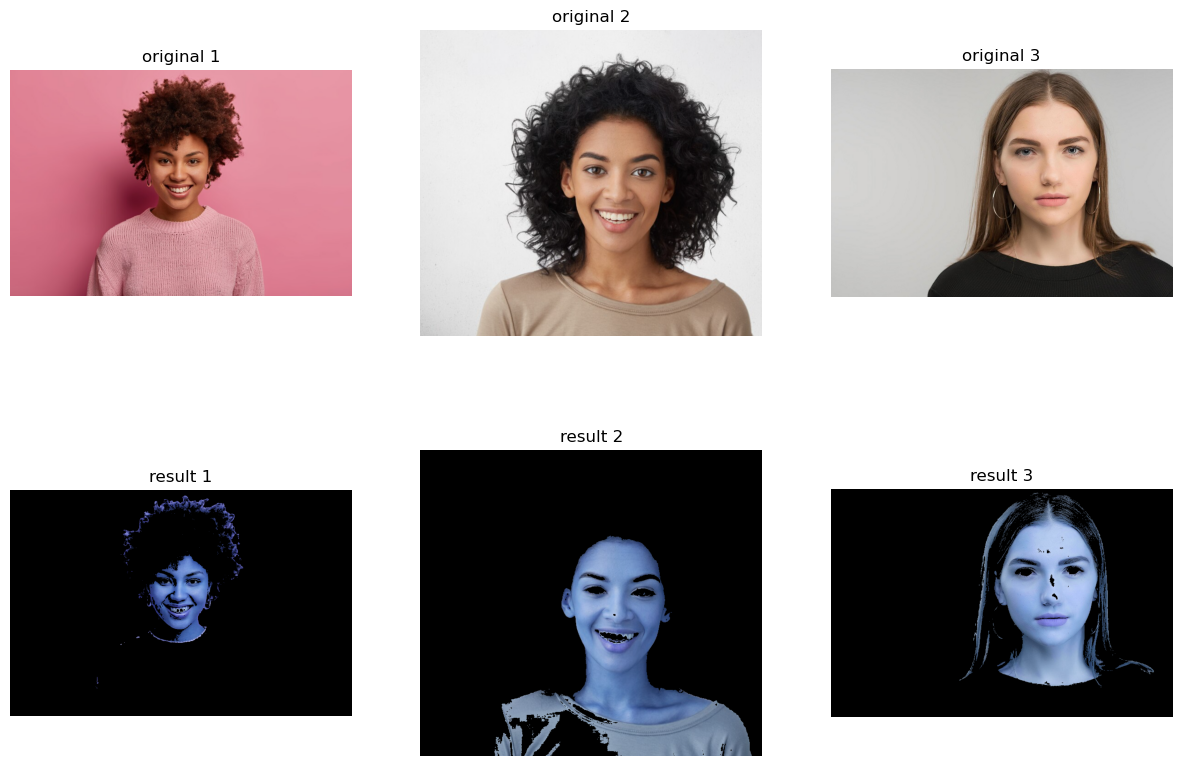

In [8]:
plt.figure(figsize=[15,10])
plt.subplot(231);plt.imshow(image1);plt.title("original 1");plt.axis('off');
plt.subplot(232);plt.imshow(image);plt.title("original 2");plt.axis('off');
plt.subplot(233);plt.imshow(image2);plt.title("original 3");plt.axis('off');
plt.subplot(234);plt.imshow(filtered_image[...,::-1]);plt.title("result 1");plt.axis('off');
plt.subplot(235);plt.imshow(result_image[...,::-1]);plt.title("result 2");plt.axis('off');
plt.subplot(236);plt.imshow(result_image2[...,::-1]);plt.title("result 3");plt.axis('off');